In [15]:
from tensorflow import keras
import os
import tensorflow as tf
AUTOTUNE = tf.data.AUTOTUNE

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import skimage.io
import keras.backend as K
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout,BatchNormalization ,Activation
from tensorflow.keras.models import Model, Sequential
from keras.applications.nasnet import NASNetLarge
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam

In [17]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
#!unzip /content/face_data.zip -d face_data

In [20]:
def evaluate_model(model, X_val_bal, y_val_bal):
    y_score = model.predict(X_val_bal)
    y_pred = np.rint(y_score) # to have 0 or 1
    y_true = y_val_bal
    print("Classification report: ")
    print(metrics.classification_report(y_true, y_pred, digits=4))

    # Display the confusion matrix
    confusion_matrix_display = metrics.ConfusionMatrixDisplay.from_estimator(model, X_val_bal, y_true)
    confusion_matrix_display.plot(cmap='viridis', values_format='')
    plt.title('Confusion Matrix')
    plt.show()

    # ROC curve
    fpr, tpr, th = metrics.roc_curve(y_true, y_score)
    roc_auc = metrics.roc_auc_score(y_true, y_score)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
#_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
#path_to_zip = keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
#PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

68606236/68606236 [==============================] - 0s 0us/step


In [21]:
PATH = '/content/face_data/Images'

In [22]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
train_happy_dir = os.path.join(train_dir, 'Happy')
train_sad_dir = os.path.join(train_dir, 'Sad')
train_angry_dir = os.path.join(train_dir, 'Angry')
train_disgust_dir = os.path.join(train_dir, 'Disgust')
train_fear_dir = os.path.join(train_dir, 'Fear')
train_neutral_dir = os.path.join(train_dir, 'Neutral')
train_surprise_dir = os.path.join(train_dir, 'Surprise')

validation_happy_dir = os.path.join(validation_dir, 'Happy')
validation_sad_dir = os.path.join(validation_dir, 'Sad')
validation_angry_dir = os.path.join(validation_dir, 'Angry')
validation_disgust_dir = os.path.join(validation_dir, 'Disgust')
validation_fear_dir = os.path.join(validation_dir, 'Fear')
validation_neutral_dir = os.path.join(validation_dir, 'Neutral')
validation_surprise_dir = os.path.join(validation_dir, 'Surprise')

In [23]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.2,

        rotation_range=5,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        #zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale = 1./255,
                                  validation_split = 0.2)

test_datagen  = ImageDataGenerator(rescale = 1./255
                                  )

In [24]:
train_dataset  = train_datagen.flow_from_directory(directory = train_dir,
                                                   target_size = (48,48),
                                                   class_mode = 'categorical',
                                                   subset = 'training',
                                                   batch_size = 64)


Found 22968 images belonging to 7 classes.


In [25]:
valid_dataset = valid_datagen.flow_from_directory(directory = validation_dir,
                                                  target_size = (48,48),
                                                  class_mode = 'categorical',
                                                  subset = 'validation',
                                                  batch_size = 64)

Found 715 images belonging to 7 classes.


In [26]:
base_model = tf.keras.applications.VGG16(input_shape=(48,48,3),include_top=False,weights="imagenet")

58889256/58889256 [==============================] - 0s 0us/step


In [27]:
# Freezing Layers

for layer in base_model.layers[:-4]:
    layer.trainable=False

In [28]:
# Building Model

model=Sequential()
model.add(base_model)
model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(32,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(32,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(32,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(7,activation='softmax'))

In [29]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.2,

        rotation_range=5,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        #zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale = 1./255,
                                  validation_split = 0.2)

In [ ]:
import tensorflow as tf

# Define your data directory
#data_dir = 'your_directory'

# Define image size and batch size
image_size = (128, 128)
batch_size = 32

# Create an ImageDataGenerator for preprocessing and data augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Create a data generator for your dataset
data_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  # Use 'categorical' for one-hot encoded labels
    shuffle=True  # Shuffle the data
)

# Split the data generator into X (features) and Y (labels)
X = []
Y = []

# Define the number of batches to iterate through (adjust if needed)
num_batches = len(data_generator)

for i in range(num_batches):
    batch_x, batch_y = data_generator[i]
    X.append(batch_x)
    Y.append(batch_y)

# Convert lists to NumPy arrays
X = np.concatenate(X)
Y = np.concatenate(Y)


In [30]:
# Model Summary

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 dropout (Dropout)           (None, 1, 1, 512)         0         
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 32)                16416     
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                        

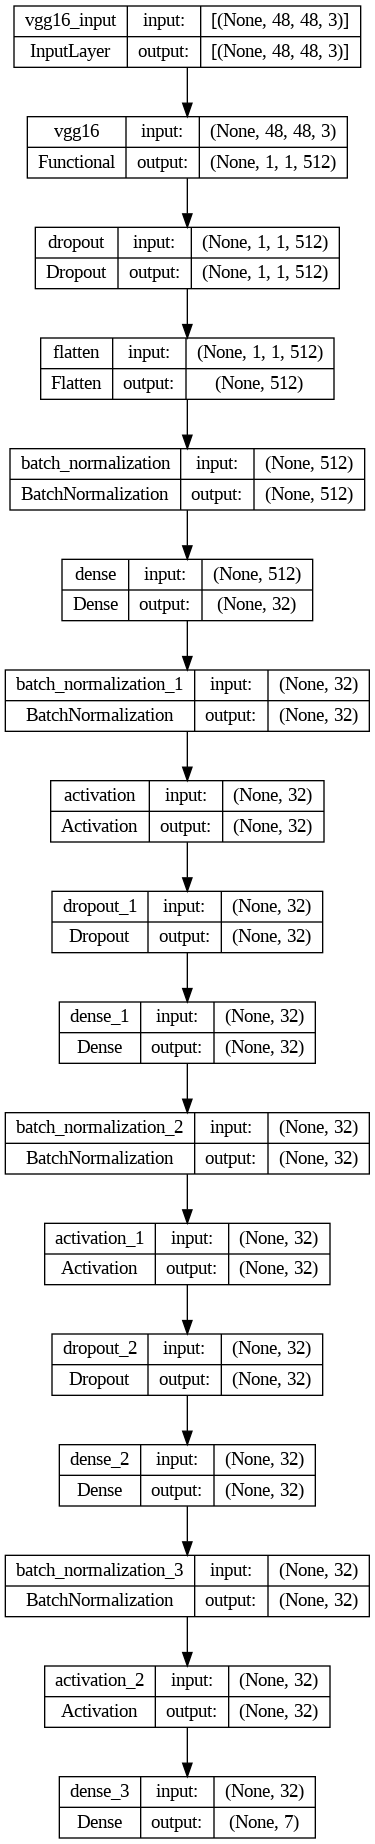

In [31]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='convnet.png', show_shapes=True,show_layer_names=True)
Image(filename='convnet.png')

In [32]:
def f1_score(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val


In [33]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
        f1_score,
]

In [34]:
lrd = ReduceLROnPlateau(monitor = 'val_loss',patience = 20,verbose = 1,factor = 0.50, min_lr = 1e-10)

mcp = ModelCheckpoint('model.h5')

es = EarlyStopping(verbose=1, patience=20)

In [35]:
model.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=METRICS)

In [36]:
history=model.fit(train_dataset,validation_data=valid_dataset,epochs = 30,verbose = 1,callbacks=[lrd,mcp,es])

Epoch 1/30
359/359 [==============================] - 58s 102ms/step - loss: 1.9554 - accuracy: 0.8558 - precision: 0.2208 - recall: 0.0037 - auc: 0.5817 - f1_score: 0.0072 - val_loss: 1.8437 - val_accuracy: 0.8571 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6340 - val_f1_score: 0.0000e+00 - lr: 0.0010
Epoch 2/30
359/359 [==============================] - 34s 95ms/step - loss: 1.8279 - accuracy: 0.8567 - precision: 0.3030 - recall: 0.0022 - auc: 0.6435 - f1_score: 0.0043 - val_loss: 1.7628 - val_accuracy: 0.8571 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6887 - val_f1_score: 0.0000e+00 - lr: 0.0010
Epoch 3/30
359/359 [==============================] - 36s 101ms/step - loss: 1.7848 - accuracy: 0.8571 - precision: 0.4940 - recall: 0.0072 - auc: 0.6700 - f1_score: 0.0141 - val_loss: 1.8218 - val_accuracy: 0.8571 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6567 - val_f1_score: 0.0000e+00 - lr: 0.0010
Epoch 4/30
359/359 [===

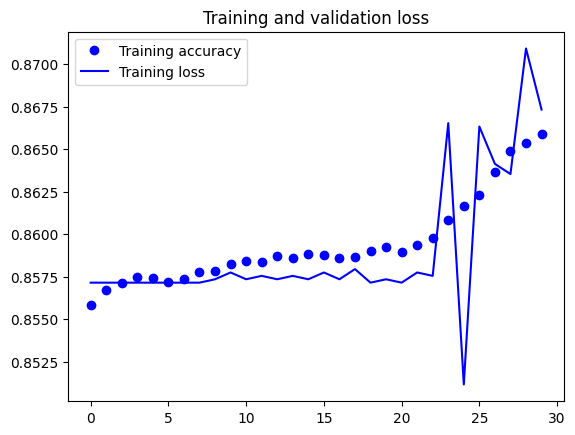

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epoches = range(len(acc))

plt.plot(epoches, acc, 'bo', label='Training accuracy')
plt.plot(epoches, val_acc, 'b', label='Training loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [39]:
X_valid, y_valid = valid_dataset.next()

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

def evaluate_model(model, X_val_bal, y_val_bal):
    y_score = model.predict(X_val_bal)
    y_pred = np.rint(y_score)  # Round probabilities to 0 or 1
    y_true = y_val_bal

    print("Classification report: ")
    print(classification_report(y_true, y_pred, digits=4))

    # ROC curve for each label
    plt.figure(figsize=(10, 6))
    for i in range(y_true.shape[1]):
        fpr, tpr, _ = roc_curve(y_true[:, i], y_score[:, i])
        roc_auc = roc_auc_score(y_true[:, i], y_score[:, i])
        plt.plot(fpr, tpr, label=f'ROC curve for Label {i} (area = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curves for each label')
    plt.legend(loc="lower right")
    plt.show()

2/2 [==============================] - 0s 16ms/step
Classification report: 
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000         6
           1     0.0000    0.0000    0.0000         2
           2     0.0000    0.0000    0.0000         9
           3     0.8000    0.4444    0.5714        18
           4     0.0000    0.0000    0.0000         8
           5     0.0000    0.0000    0.0000        13
           6     0.5000    0.1250    0.2000         8

   micro avg     0.7500    0.1406    0.2368        64
   macro avg     0.1857    0.0813    0.1102        64
weighted avg     0.2875    0.1406    0.1857        64
 samples avg     0.1406    0.1406    0.1406        64



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


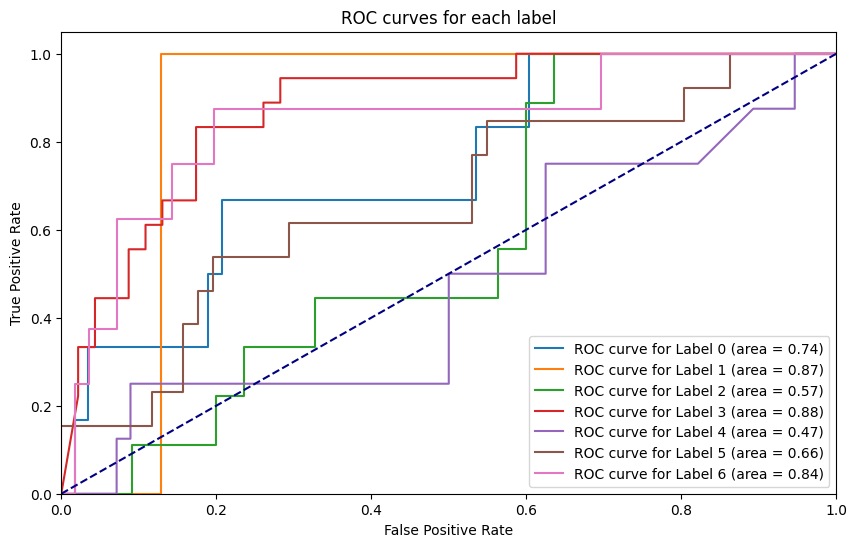

In [41]:
# Call the evaluate_model function with your model and data
evaluate_model(model, X_valid, y_valid)